In [2]:
from sqlalchemy import create_engine, text, inspect, func
import sqlite3

# ORM imports
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import Column, Integer, String, Float, Boolean
from sqlalchemy.orm import Session
from sqlalchemy.ext.declarative import declarative_base

# API
import requests
import json

# Data Science and Visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import datetime as dt

## Automapping the Bases

In [3]:
# Create engine using the `f1.sqlite` database file
engine = create_engine("sqlite:///f1.sqlite")

In [4]:
# Create a base using `automap_base()` for reflection
Base = automap_base()

# Use the Base class to reflect the tables in the Hawaii Database
Base.prepare(autoload_with=engine)

# Print all of the classes mapped to the Base
Base.classes.keys()

['results', 'constructors', 'circuits', 'drivers', 'races']

In [5]:
# Save references to the classes
Circuits = Base.classes.circuits
Constructors = Base.classes.constructors
Drivers = Base.classes.drivers
Results = Base.classes.results
Races = Base.classes.races

In [6]:
# Create a session
session = Session(engine)

## Charts

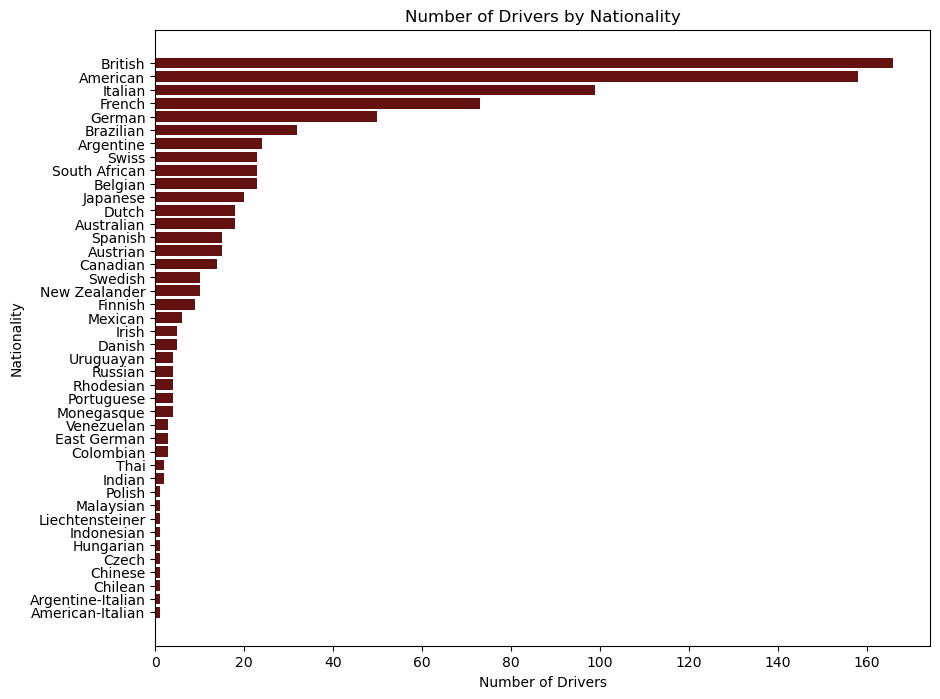

In [7]:
## Horizontal Bar Chart showing the nationalities of the drivers

driver_nationalities = session.query(Drivers.nationality, func.count(Drivers.nationality)).group_by(Drivers.nationality).order_by(func.count(Drivers.nationality).asc()).all()

nationalities = [data[0] for data in driver_nationalities]
driver_counts = [data[1] for data in driver_nationalities]

plt.figure(figsize=(10, 8))
plt.barh(nationalities, driver_counts, color='#641211')
plt.xlabel('Number of Drivers')
plt.ylabel('Nationality')
plt.title('Number of Drivers by Nationality')
plt.show()

In [7]:
## Possible areas of additional cleaning:

## East Germany into Germany
## Rhodesian become Zimbabwe
## Argentine-Italian and American-Italian in their respective countries

In [9]:
nationality = 'Argentine'

driver_query = session.query(Drivers.forename, Drivers.surname, Drivers.nationality, func.count(Results.position)).\
filter(Drivers.driverId == Results.driverId).\
filter(Results.position==1).filter(Drivers.nationality == f"{nationality}").\
group_by(Drivers.forename, Drivers.surname).order_by(func.count(Results.position).asc()).all()

display(driver_query)

df = pd.DataFrame(driver_query, columns=["forename", "surname", "Nationality", "wins"])

[('José Froilán', 'González', 'Argentine', 2),
 ('Carlos', 'Reutemann', 'Argentine', 12),
 ('Juan', 'Fangio', 'Argentine', 24)]

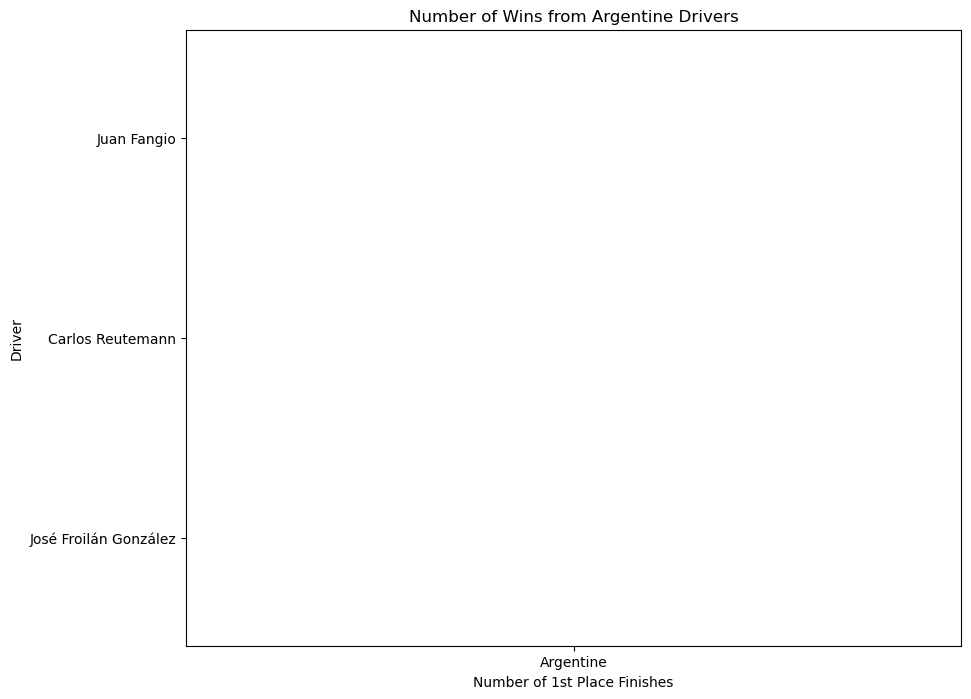

In [10]:
name = [data[0] + " " + data[1] for data in driver_query]
num_of_1st = [data[2] for data in driver_query]

# Create a horizontal bar chart using Matplotlib
plt.figure(figsize=(10, 8))
plt.barh(name, num_of_1st, color='#404E4D')
plt.xlabel('Number of 1st Place Finishes')
plt.ylabel('Driver')
plt.title(f'Number of Wins from {nationality} Drivers')
plt.show()

In [9]:
# Close session and end engine
session.close()
engine.dispose()